In [1]:
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
import tensorflow as tf

[[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]]


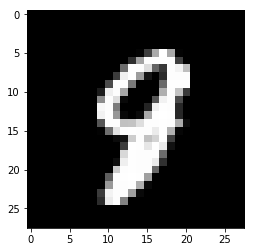

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
batch_xs,batch_ys=mnist.train.next_batch(1)
X=batch_xs
X=X.reshape(28,28)
plt.gray()
print (batch_ys)
plt.imshow(X)

In [13]:
x=tf.placeholder(tf.float32,[None,784])
W=tf.Variable(tf.zeros([784,10]))
b=tf.Variable(tf.zeros([10]))
y=tf.nn.softmax(tf.matmul(x,W)+b)
y_=tf.placeholder(tf.float32,[None,10])

In [15]:
cross_entropy= tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y),reduction_indices=[1]))

In [16]:
train_step=tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
sess=tf.InteractiveSession()
tf.global_variables_initializer().run()

In [21]:
for _ in range(1000):
    batch_xs,batch_ys=mnist.train.next_batch(100)
    sess.run(train_step,feed_dict={x: batch_xs,y_: batch_ys})

In [22]:
correct_prediction=tf.equal(tf.argmax(y,1),tf.argmax(y_,1))

In [23]:
accuracy=tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [28]:
print(sess.run(accuracy, feed_dict={x: mnist.test.images,y_ : mnist.test.labels}))

0.9165


In [30]:
#implementing Mnist on keras

In [42]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [43]:
from keras.datasets import mnist
(x_train, y_train), (x_test,y_test)=mnist.load_data()

In [44]:
model=Sequential()

In [45]:
model.add(Dense(256, activation='sigmoid', input_shape=(784,)))

In [46]:
model.add(Dense(10, activation='softmax'))

In [47]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'] )